In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\AD15855\OneDrive - Lumen\Desktop\python\assignment\Sales_add.csv')

# To clarify whether there is any increase in sales after stepping into digital marketing


Data checking

In [3]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [4]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [5]:
data.mean()

C:\Windows\Temp\ipykernel_1372\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


Sales_before_digital_add(in $)    149239.954545
Sales_After_digital_add(in $)     231123.727273
dtype: float64

In [6]:
data.shape

(22, 5)

In [7]:
data['Sales_before_digital_add(in $)'].mean()

149239.95454545456

In [8]:
data['Sales_After_digital_add(in $)'].mean()

231123.72727272726

In [9]:
data['Sales_before_digital_add(in $)'].var()

220345610.2359307

In [10]:
data['Sales_After_digital_add(in $)'].var()

653148853.7316018

In [11]:
data['Sales_before_digital_add(in $)'].skew()

0.5780328152845783

In [12]:
data['Sales_After_digital_add(in $)'].skew()

-0.02266883113277529

So this is Highly skewed distribution

In [13]:
import statistics as stat

In [14]:
stat.mean(data['Sales_before_digital_add(in $)'])

149239.95454545456

In [15]:
stat.mean(data['Sales_After_digital_add(in $)'])

231123.72727272726

In [16]:
stat.variance(data['Sales_before_digital_add(in $)'])

220345610.23593074

In [17]:
stat.variance(data['Sales_After_digital_add(in $)'])

653148853.7316017

In [18]:
stat.stdev(data['Sales_before_digital_add(in $)'])

14844.042920846421

In [19]:
stat.stdev(data['Sales_After_digital_add(in $)'])

25556.777060725042

Z-Test

In [20]:
 #Null hypo H0 :There is no increase in sales after stepping into digital marketing.
#Alternate Hyp = There is increase in sales after stepping into digital marketing.


In [21]:
from statsmodels.stats.weightstats import ztest

In [22]:
z_stat,p_val =ztest(data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'],value =0)

In [23]:
z_stat

-12.995084451110877

In [24]:
p_val

1.3046367348248653e-38

In [25]:
if p_val<0.05:
    print('Reject Null hypothesis')
else:
    print('Accept Null hypothesis')

Reject Null hypothesis


Meaning there is increase in sales after stepping into digital marketing.

# To check whether there is any dependency between the features “Region” and “Manager”

Chi square test


#Null Hypo : No relation

#Acceptance Hypo : There is relation 

In [26]:
from scipy.stats import chi2_contingency

In [27]:

Dep_data = (data['Sales_before_digital_add(in $)'],data['Sales_After_digital_add(in $)'])

In [28]:

chi2_contingency(Dep_data)

Chi2ContingencyResult(statistic=50418.98816785626, pvalue=0.0, dof=21, expected_freq=array([[158243.59208   , 146308.74878564, 153225.29220049,
        150656.89571799, 163978.34352948, 154633.8689454 ,
        138397.96206394, 141947.26157215, 155971.42831125,
        131712.12704074, 142236.43178413, 178609.8854221 ,
        137421.37501155, 158767.00193451, 147841.311673  ,
        143015.66114775, 147437.57198762, 141058.95579207,
        140926.337703  , 143240.09176003, 161187.08587953,
        146461.76965765],
       [245067.40792   , 226584.25121436, 237295.70779951,
        233318.10428201, 253948.65647052, 239477.1310546 ,
        214333.03793606, 219829.73842785, 241548.57168875,
        203978.87295926, 220277.56821587, 276608.1145779 ,
        212820.62498845, 245877.99806549, 228957.688327  ,
        221484.33885225, 228332.42801238, 218454.04420793,
        218248.662297  , 221831.90823997, 249625.91412047,
        226821.23034235]]))

In [29]:

chi_stat,p_value1,dof,relation = chi2_contingency(Dep_data)

In [30]:

p_value1

0.0

In [31]:

if p_value1<0.05:
    print('Reject Null Hypotheses')
else:
    print('Accept Null Hypotheses')

Reject Null Hypotheses


In [32]:

data['Sales_Difference'] = (data['Sales_After_digital_add(in $)']-data['Sales_before_digital_add(in $)'])

In [33]:

data['Sales_Percentage'] = (data['Sales_Difference']/data['Sales_After_digital_add(in $)'])*100

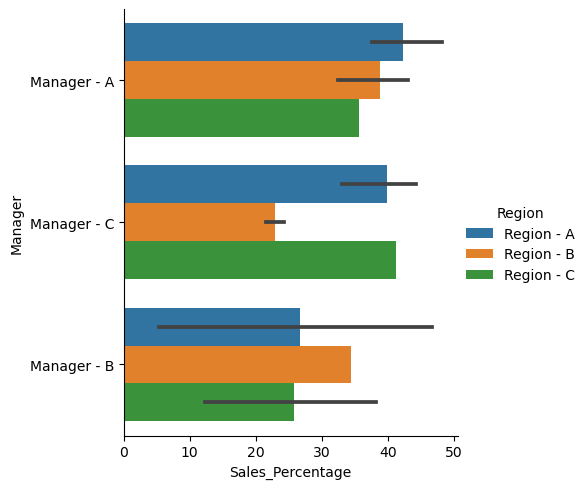

In [34]:

sns.catplot(data=data, y="Manager", x="Sales_Percentage",hue="Region",kind="bar")
plt.show()